In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [11]:
w = [4,4,4,4,4,5]
d = 3
w = w[d:]
w = np.reshape(w, (1,len(w)))

In [12]:
w

array([[4, 4, 5]])

In [43]:
chroma = np.random.rand(1700,12)
start_time = 2
durations = [0.04,0.05, 0.1, 0.25, 0.5 , 1]
hop_size=1024
sample_rate=44100

In [62]:
def print_windowing(w,c,s,d):
    
#     print('--> Processed Window: {}'.format(w))
    print('Duration: {}'.format(d))
    plt.imshow(chroma[s:s+d].T)
    if len(w) == 1:
        plt.scatter(0,w[0],c='r')
    else:
        plt.plot(w*(-1)+5,c='r')
    plt.show()

# Annotated Beat Chroma Estimator

Duration: 1


/home/eduard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


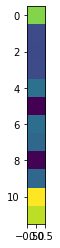

Duration: 2


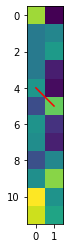

Duration: 4


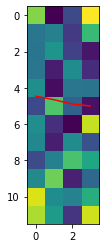

Duration: 10


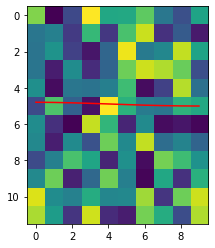

Duration: 21


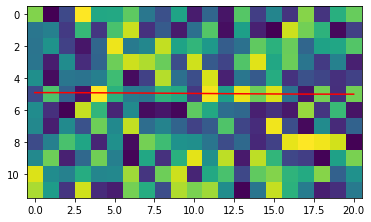

Duration: 43


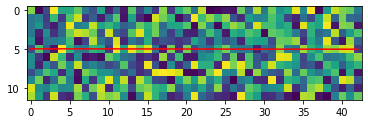

In [63]:
for dur in durations:
    s = int(float(start_time) * sample_rate / hop_size)
    d = int(float(dur) * sample_rate / hop_size)

    d = min(d, len(chroma) - s)
    
    w = eval('np.hanning(2*d)')

    w = w[d:] / np.sum(w[d:])
    
    c = chroma[s:s+d]
    
    print_windowing(w,c,s,d)


# Solving null window problem

Duration: 1


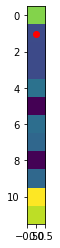

Duration: 2


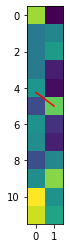

Duration: 4


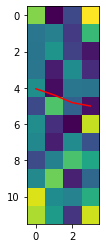

Duration: 10


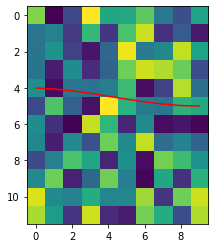

Duration: 21


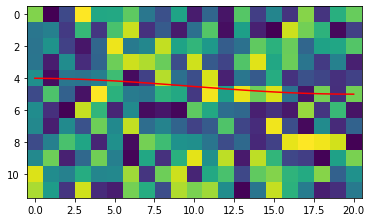

Duration: 43


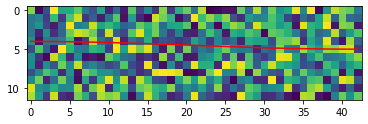

In [66]:
for dur in durations:
    s = int(float(start_time) * sample_rate / hop_size)
    d = int(float(dur) * sample_rate / hop_size)
    
    #################
    if len(chroma) - s < d: # For the last note, maybe duration is larger than actual chroma. Consider only
                            # the frames inside chroma
        d = int(len(chroma) - s)
    #################   
    
    w = eval('np.hanning(2*d)')
    
    #################
    if (len(w) == 1) or (len(w) == 2): #Force window being one for very short notes
        w= np.ones(len(w))
    #################   

    w = w[d:]
    
    c = chroma[s:s+d]
    
    print_windowing(w,c,s,d)

# Adding percentages

Duration: 1


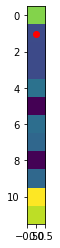

Duration: 2


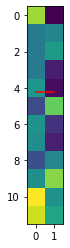

Duration: 4


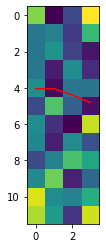

Duration: 10


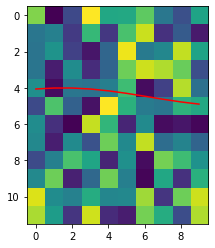

Duration: 21


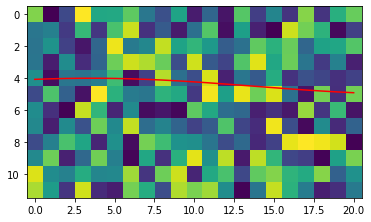

Duration: 43


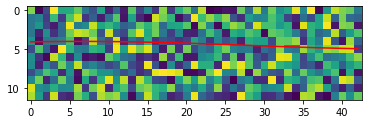

In [69]:
for dur in durations:
    s = int(float(start_time) * sample_rate / hop_size)
    d = int(float(dur) * sample_rate / hop_size)
    if len(chroma) - s < d: 
        d = int(len(chroma) - s) 
    w = eval('np.hanning(2*d)')
    if (len(w) == 1) or (len(w) == 2):
        w= np.ones(len(w))
    
    #########
    shift = int(d*0.85) #Consider the window values from a percentage of duration
    w = w[shift:shift + d]
    ##########
    c = chroma[s:s+d]

    print_windowing(w,c,s,d)

# Adding sustain 

Duration: 1


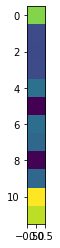

Duration: 2


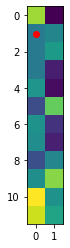

Duration: 4


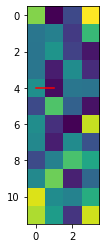

Duration: 10


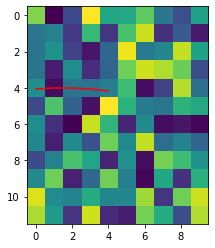

Duration: 21


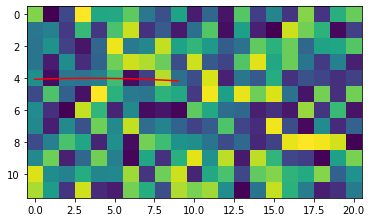

Duration: 43


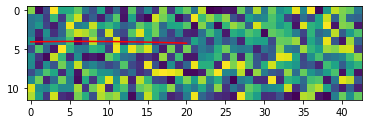

In [76]:
for dur in durations:
    s = int(float(start_time) * sample_rate / hop_size)
    d = int(float(dur) * sample_rate / hop_size)
    if len(chroma) - s < d: 
        d = int(len(chroma) - s) 
    w = eval('np.hanning(2*d)')
    
    
    
    
    if (len(w) == 1) or (len(w) == 2):
        w= np.ones(len(w))
    

    shift = int(d*0.85) 
    sustain = int(d * 0.50) #Control the time where the window will be considering the values
    w = w[shift:shift + sustain]
    print(w)
    c = chroma[s:s+d]

    print_windowing(w,c,s,d)

Duration: 43
Shift: 36


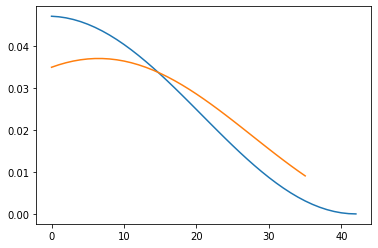

In [7]:

# 1 second duration example
duration = 1
hop_size=1024
sample_rate=44100

d = int(float(duration) * sample_rate / hop_size)
w = eval('np.hanning(2*d)')
shift = int(d*0.85)

print('Duration: {}'.format(d))
print('Shift: {}'.format(shift))

nd = shift
nw = w[shift:shift + nd] / np.sum(w[shift:shift + nd])
w = w[d:] / np.sum(w[d:])

plt.plot(w)
plt.plot(nw)
plt.show()

# advice: instead of 0.15 use e.g. 15% or just use AdaptiveChromaEstimator


Chromas: 100
Start frame: 86
Duration estimated: 2


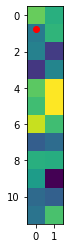

Duration estimated: 4


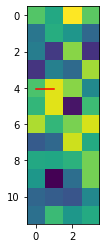

Duration estimated: 10


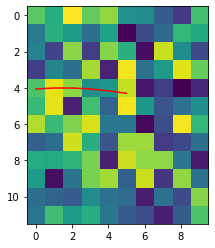

Duration estimated: 14


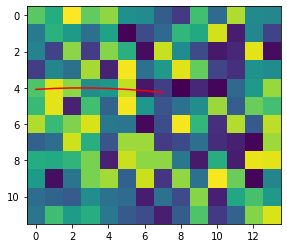

Duration estimated: 14


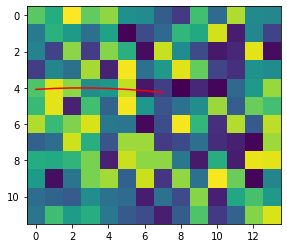

In [17]:
s = int(float(2) * sample_rate / hop_size)
print('Chromas: {}'.format(len(chroma)))
print('Start frame: {}'.format(s))

for d in list([0.05, 0.1, 0.25, 0.5 , 1]):
    d = int(float(d) * sample_rate / hop_size)
    if len(chroma) - s < d: #If last chroma finishes early than the duration of the note
        d = int(len(chroma) - s)
        
    sustain = int(d * 0.60)
    print('Duration estimated: {}'.format(d))
    
    
    w = eval('np.hanning(2*d)')
#     print('Hanning Window: {}'.format(w))
    if (len(w) == 1) or (len(w) == 2): 
        w= np.ones(len(w))
        
    shift = int(d*0.85)
#     print('---> Shift: {}'.format(shift))
    w = w[shift:shift + sustain]
#     print('---> Processed Hanning Window: {}'.format(w))
    
    plt.imshow(chroma[s:s+d].T)
    if len(w) == 1:
        plt.scatter(0,w[0],c='r')
    else:
        plt.plot(w*(-1)+5,c='r')
    plt.show()


1) link to paper
https://repositori.upf.edu/bitstream/handle/10230/44130/eremenko_CSME2020_perf.pdf?sequence=1&isAllowed=y

2) two steps:
 - "learning chroma distributions"
 - "calibrating/scaling" to fit grading
 let's concentrate on the first step.

https://github.com/MTG/pysimmusic-experiments/blob/master/guitar_for_beginners/training_individual_chord_model.py

3) What model is used currently?
